In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import random as random

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'6f4ceb243793f6a90aeed94e4f17b8a4'

## Generate Cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #size 1500
#zip in to a list of tuples
lat_lngs = zip(lats, lngs)
city_lat=[]
#to print zipped object
#for i in lat_lngs:
#    print(i)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Print the city count to confirm sufficient count
print(f"length of cities is {len(cities)}")
print(f"length of city_lat is {len(city_lat)}")



length of cities is 598
length of city_lat is 598


## Perform API Calls

In [3]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #use imperial to get farenheit

#build partial string query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#initialize lists to hold temperature, humidity clouds, wind, valid cities, invalid cities and valid latitudes
temp = []
humidity= []
clouds = []
wind = []
city_not_found=[]
valid_cities=[]
valid_lat=[]

for i in range(len(cities)):
    response = requests.get(query_url+cities[i]).json()
    
    if response["cod"] == "404":
        print(f"city number {i}, {cities[i]} is not found")
        city_not_found.append(cities[i])
    else:
        with open("output_log.txt","w")as text:
            print(f"Getting data for city number {i}, {cities[i]}")
        text.close()
        valid_cities.append(cities[i])
        valid_lat.append(city_lat[i])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])

#print(f"cities list {valid_cities}, len {len(valid_cities)}")  
#print(f"temp list {temp}, len {len(temp)}")
#print(f"humidity list {humidity}, len {len(humidity)}")
#print(f"clouds list {clouds}, len {len(clouds)}")
#print(f"wind list {wind}, len {len(wind)}")
#print(f"valid city lat{valid_lat}, len {len(valid_lat)}")

Getting data for city number 0, cortez
Getting data for city number 1, hermanus
Getting data for city number 2, mataura
Getting data for city number 3, rikitea
Getting data for city number 4, yellowknife
Getting data for city number 5, mar del plata
Getting data for city number 6, tasiilaq
Getting data for city number 7, torbay
Getting data for city number 8, punta arenas
Getting data for city number 9, cherskiy
Getting data for city number 10, butaritari
Getting data for city number 11, jamestown
Getting data for city number 12, san quintin
Getting data for city number 13, gondanglegi
Getting data for city number 14, vaini
Getting data for city number 15, barrow
Getting data for city number 16, busselton
Getting data for city number 17, codrington
Getting data for city number 18, fortuna
Getting data for city number 19, chokurdakh
Getting data for city number 20, nanortalik
Getting data for city number 21, ushuaia
Getting data for city number 22, coolum beach
Getting data for city num

Getting data for city number 192, muros
Getting data for city number 193, aromashevo
Getting data for city number 194, oriximina
Getting data for city number 195, matamoros
city number 196, barentsburg is not found
Getting data for city number 197, cortes
city number 198, mys shmidta is not found
Getting data for city number 199, hofn
Getting data for city number 200, lahij
Getting data for city number 201, yulara
Getting data for city number 202, malmyzh
Getting data for city number 203, hasaki
Getting data for city number 204, tautira
Getting data for city number 205, coreau
Getting data for city number 206, lilongwe
Getting data for city number 207, moussoro
Getting data for city number 208, kapaa
Getting data for city number 209, pacific grove
Getting data for city number 210, kuzovatovo
city number 211, stornoway is not found
Getting data for city number 212, ancud
Getting data for city number 213, college
city number 214, kamenskoye is not found
Getting data for city number 215, 

city number 384, svetlyy is not found
city number 385, one hundred mile house is not found
Getting data for city number 386, dingle
city number 387, saleaula is not found
Getting data for city number 388, samarai
Getting data for city number 389, mazagao
Getting data for city number 390, arlit
Getting data for city number 391, porto walter
Getting data for city number 392, poum
Getting data for city number 393, baruun-urt
Getting data for city number 394, emerald
Getting data for city number 395, macklin
Getting data for city number 396, san ignacio
Getting data for city number 397, labuhan
Getting data for city number 398, espanola
Getting data for city number 399, anadyr
Getting data for city number 400, smoky lake
Getting data for city number 401, tromso
Getting data for city number 402, sihora
Getting data for city number 403, bilibino
Getting data for city number 404, cadillac
Getting data for city number 405, bagula
Getting data for city number 406, capreol
Getting data for city 

Getting data for city number 576, ulcinj
Getting data for city number 577, lena
Getting data for city number 578, grindavik
Getting data for city number 579, zverinogolovskoye
Getting data for city number 580, lensk
city number 581, brasileia is not found
Getting data for city number 582, huaura
Getting data for city number 583, yongan
Getting data for city number 584, wawa
Getting data for city number 585, balsas
Getting data for city number 586, uige
Getting data for city number 587, finschhafen
Getting data for city number 588, joura
Getting data for city number 589, sitges
Getting data for city number 590, talara
Getting data for city number 591, stalowa wola
Getting data for city number 592, le port
Getting data for city number 593, zhigalovo
Getting data for city number 594, sao gabriel da cachoeira
Getting data for city number 595, balasheyka
Getting data for city number 596, basavakalyan
Getting data for city number 597, nahan


## Create master table

In [4]:
#create dictionary of cities, temp, humidity, clouds, and wind
d = {"Cities": valid_cities, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Latitude":valid_lat}

#convert dictionary to dataframe
df = pd.DataFrame(d)

#save csv of all data retrieved
df.to_csv("data_retrieved.csv")
df.head()

,Cities,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,cortez,36.41,44,1,12.75,37.857946
1,hermanus,64.00,79,98,3.00,-76.194663
2,mataura,54.00,76,88,8.99,-50.506324
3,rikitea,76.91,74,95,12.15,-31.258351
4,yellowknife,-20.09,75,75,5.82,64.616574


## Plot tables

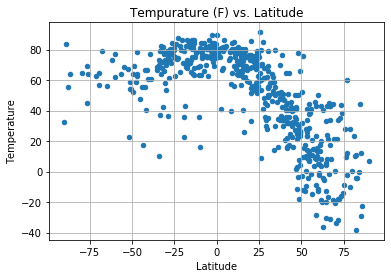

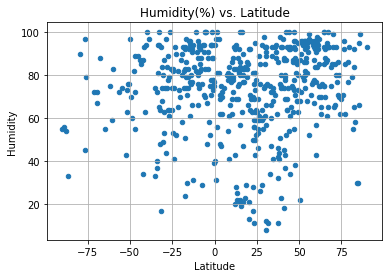

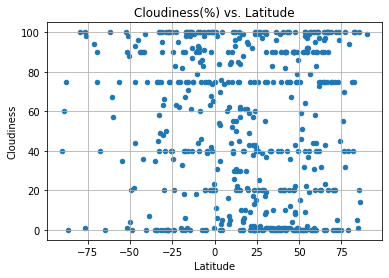

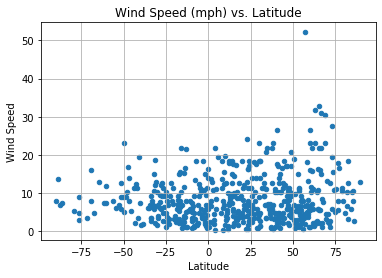

In [5]:
#plot latitude and temperature
df.plot(kind="scatter", x="Latitude", y="Temperature")
plt.title("Tempurature (F) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/temp_latitude.png")
plt.show()

#plot latitude and humidity
df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.title("Humidity(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/humidity_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.title("Cloudiness(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/cloudiness_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/wind_latitude.png")
plt.show()

In [6]:
#Get sample response for reference

response=requests.get("http://api.openweathermap.org/data/2.5/weather?appid=6f4ceb243793f6a90aeed94e4f17b8a4&units=imperial&q=paris").json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.86, 'lon': 2.35},
 'dt': 1578350555,
 'id': 2988507,
 'main': {'feels_like': 38.16,
          'humidity': 93,
          'pressure': 1025,
          'temp': 43.36,
          'temp_max': 45,
          'temp_min': 42.01},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6540,
         'sunrise': 1578296602,
         'sunset': 1578326913,
         'type': 1},
 'timezone': 3600,
 'visibility': 5000,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09n',
              'id': 300,
              'main': 'Drizzle'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 200, 'speed': 5.82}}
